### 선형회귀모델
- 입력특성에 대한 선형함수를 만들어 예측을 수행하는 모데
- 단순선형회귀 모델 : y = wx + b
- 다중선형회귀 모델 : y =w1x1 + x2x2 + ... + wp*xp + b

## 샘플 데이터 생성

In [3]:
import pandas as pd

In [5]:
sample_data = pd.DataFrame([[9,90],[6,60],[4,40],[2,20]], 
                           columns=['공부시간', '성적'],
                           index=['병관','영화','승환', '원호'])
sample_data

,공부시간,성적
병관,9,90
영화,6,60
승환,4,40
원호,2,20


In [17]:
# 문제 (입력특성)
X = sample_data['공부시간']
y = sample_data['성적']

### 모델링을 위한 sklearn 패키지 활용
- 머신러닝 학습을 위한 모델, 평가지표, 학습용 데이터셋 등을 가지고 있는 파이썬 패키지

In [10]:
# 전통적인 선형회귀모델을 구현한 클래스
from sklearn.linear_model import LinearRegression

#### 모델링 순서
1. 모델 객체 생성
2. 문제/정답 학습
3. 모델 평가
4. 모델 예측

In [13]:
# 선형회귀 모델 객체 생성
score_model = LinearRegression()

In [25]:
# 문제, 정답 입력
# X.values.reshape(-1, 1) # 1차원 데이터를 2차원으로 변경
score_model.fit(X.values.reshape(-1,1), y)

LinearRegression()

In [27]:
# 학습된 데이터의 가중치와 절편
print('가중치 : ', score_model.coef_)
print('절편 : ', score_model.intercept_)

가중치 :  [10.]
절편 :  0.0


In [29]:
# score로 점수를 내주기
print("score : ", score_model.score(X.values.reshape(-1,1), y))

score :  1.0


### 다중선형회귀
- 입력특성이 2개 이상인 선형회귀모델

In [32]:
sample_data['게임시간'] = [2,4,8,15]
sample_data

,공부시간,성적,게임시간
병관,9,90,2
영화,6,60,4
승환,4,40,8
원호,2,20,15


In [34]:
# 입력특성(문제)
X = sample_data[['공부시간', '게임시간']]
X

,공부시간,게임시간
병관,9,2
영화,6,4
승환,4,8
원호,2,15


### 모델생성 -> 모델학습 -> 모델평가 -> 모델예측 -> 가중치, 절편 확인

In [71]:
# 선형회귀 모델 객체 생성
score_model2 = LinearRegression()

# 모델 학습
score_model2.fit(X, y)

# 모델 평가
print("score : ", score_model2.score(X, y))

score :  1.0


In [73]:
# 모델 예측
score_model2.predict([[7,18], [24,3]])

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 70., 240.])

In [75]:
# 학습된 데이터의 가중치, 절편
print('가중치 : ', score_model2.coef_)
print('절편 : ', score_model2.intercept_)

가중치 :  [ 1.0000000e+01 -7.6164883e-16]
절편 :  1.4210854715202004e-14


### 평균제곱오차 구현하기(Mean Squared Error)
- 선형회귀 모델이 학습하는 과정 또는 결과에 대해서 잘못되었는지, 잘 되었는지를 파악하는 지표로 사용하는 알고리즘
- MSE같은 알고리즘을 비용함수(Cost Function)이라고 부른다.
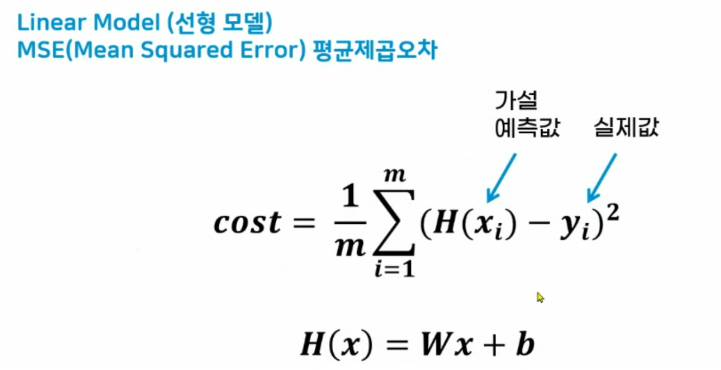

In [79]:
# 선형회귀 가상함수 만들기
def H(X, w):
    return X*w
# X : 가설함수로 입력되는 데이터(문제)

In [83]:
y_pre=sample_data['공부시간']
y_pre

병관    9
영화    6
승환    4
원호    2
Name: 공부시간, dtype: int64

In [81]:
# 평균제곱오차 함수 만들기
def MSE(X, y, w):
    # 예측값
    y_pre = H(X,w)
    # 오차 구하기
    error = y_pre - y
    # 오차의 제곱
    squared_error = error**2
    return squared_error.mean()

In [89]:
MSE(sample_data['공부시간'], sample_data['성적'], 4)

1233.0

### 평균제곱오차 그래프 그리기
- 최적의 가중치를 가지면 MSE는 최솟값을 가진다.
- 최적의 가중치를 벗어나면 MSE는 제곱의 효과로 급격히 증가한다.

In [92]:
# 최적의 가중치(10)를 중심으로 양쪽의 10만큼 가중치 생성
w_list = range(0,21)

In [94]:
cost_list = [MSE(sample_data['공부시간'], sample_data['성적'], w) for w in w_list]
cost_list

[3425.0,
 2774.25,
 2192.0,
 1678.25,
 1233.0,
 856.25,
 548.0,
 308.25,
 137.0,
 34.25,
 0.0,
 34.25,
 137.0,
 308.25,
 548.0,
 856.25,
 1233.0,
 1678.25,
 2192.0,
 2774.25,
 3425.0]

In [96]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'MSE(Cost)')

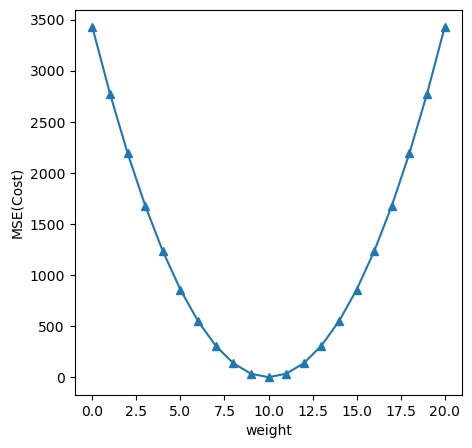

In [102]:
plt.figure(figsize=(5,5))
plt.plot(range(0,21), # x축 데이터
        cost_list, # y축 데이터
        marker='^')
plt.xlabel('weight')
plt.ylabel('MSE(Cost)')